In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns
import csv
# so we dont have to use the show command 
%matplotlib inline

# Data Cleaning

In [2]:
# importing .csv files  
latin_csv = "ObesityDataSet_raw_and_data_sinthetic.csv"
usa_csv = "obesity_data.csv"

latin_data = pd.read_csv(latin_csv)
usa_data = pd.read_csv(usa_csv)

In [3]:
# renaming columns
latin_rename = ['Gender', 'Age', 'Height', 'Weight', 'Family_history_with_overweight', 'High_caloric_food_freq', 'Vegetables_eating_freq', 'Daily_main_meals', 'Any_food_between_meals', 'Smoke', 'Daily_water', 'Monitor_daily_calories', 'Activity_freq', 'Tech_usage_time', 'Alcohol_freq', 'Transportation_type', 'Obesity_level']
usa_rename = ['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Activity_freq', 'Obesity_level']

latin_data.columns = latin_rename
usa_data.columns = usa_rename

In [4]:
latin_data
#usa_data

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_freq,Vegetables_eating_freq,Daily_main_meals,Any_food_between_meals,Smoke,Daily_water,Monitor_daily_calories,Activity_freq,Tech_usage_time,Alcohol_freq,Transportation_type,Obesity_level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
# checks the unique values 
#usa_data['Obesity_level'].unique()
#usa_data['Activity_freq'].unique()

latin_data['Obesity_level'].unique()
#latin_data['Activity_freq'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [6]:
# for making the obesity level of latin america like usa datas
def obesity_fix(level):
    if level == 'Normal_Weight':
        return 'Normal weight'
    elif level in ['Overweight_Level_I', 'Overweight_Level_II']:
        return 'Overweight'
    elif level in ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']:
        return 'Obese'
    elif level == "Insufficient_Weight":
        return 'Underweight'
    else:
        return level

In [7]:
latin_data['Obesity_level'] = latin_data['Obesity_level'].apply(obesity_fix)
    
latin_data    

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_freq,Vegetables_eating_freq,Daily_main_meals,Any_food_between_meals,Smoke,Daily_water,Monitor_daily_calories,Activity_freq,Tech_usage_time,Alcohol_freq,Transportation_type,Obesity_level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obese
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obese
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obese
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obese


In [8]:
# fix issue with the format and rounding of number values
latin_data['Activity_freq'] = latin_data['Activity_freq'].apply(lambda val: round(val) if val else val)
latin_data['Height'] = latin_data['Height'].apply(lambda val: format(val, '.2f'))
latin_data['Weight'] = latin_data['Weight'].apply(lambda val: round(val, 2))
latin_data['Age'] = latin_data['Age'].apply(lambda val: format(val, '.0f'))
latin_data['Activity_freq'] = latin_data['Activity_freq'].apply(lambda val: format(val, '.0f'))

latin_data

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_freq,Vegetables_eating_freq,Daily_main_meals,Any_food_between_meals,Smoke,Daily_water,Monitor_daily_calories,Activity_freq,Tech_usage_time,Alcohol_freq,Transportation_type,Obesity_level
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0,1.000000,no,Public_Transportation,Normal weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3,0.000000,Sometimes,Public_Transportation,Normal weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2,1.000000,Frequently,Public_Transportation,Normal weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.000000,no,2,0.000000,Frequently,Walking,Overweight
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.000000,no,0,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,2,0.906247,Sometimes,Public_Transportation,Obese
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1,0.599270,Sometimes,Public_Transportation,Obese
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1,0.646288,Sometimes,Public_Transportation,Obese
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1,0.586035,Sometimes,Public_Transportation,Obese


In [9]:
usa_data

,Age,Gender,Height,Weight,BMI,Activity_freq,Obesity_level
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


In [10]:
# changes hight to meters
usa_data['Height'] = usa_data['Height'].apply(lambda val: round(val / 100, 2))
usa_data

,Age,Gender,Height,Weight,BMI,Activity_freq,Obesity_level
0,56,Male,1.74,71.982051,23.891783,4,Normal weight
1,69,Male,1.64,89.959256,33.395209,2,Obese
2,46,Female,1.68,72.930629,25.817737,4,Overweight
3,32,Male,1.68,84.886912,29.912247,3,Overweight
4,60,Male,1.84,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,1.56,64.103182,26.480345,4,Overweight
996,35,Female,1.65,97.639771,35.830783,1,Obese
997,49,Female,1.57,78.804284,32.146036,1,Obese
998,64,Male,1.64,57.978115,21.505965,4,Normal weight


In [11]:
# rounds the values to 2 decimals
usa_data[['Weight', 'BMI']] = usa_data[['Weight', 'BMI']].apply(lambda x: x.apply(lambda y: round(y, 2)))
usa_data

,Age,Gender,Height,Weight,BMI,Activity_freq,Obesity_level
0,56,Male,1.74,71.98,23.89,4,Normal weight
1,69,Male,1.64,89.96,33.40,2,Obese
2,46,Female,1.68,72.93,25.82,4,Overweight
3,32,Male,1.68,84.89,29.91,3,Overweight
4,60,Male,1.84,69.04,20.49,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,1.56,64.10,26.48,4,Overweight
996,35,Female,1.65,97.64,35.83,1,Obese
997,49,Female,1.57,78.80,32.15,1,Obese
998,64,Male,1.64,57.98,21.51,4,Normal weight


In [12]:
# changes type of  columns
latin_data["Height"] = latin_data["Height"].astype(float)
latin_data["Age"] = latin_data["Age"].astype(int)
latin_data["Activity_freq"] = latin_data["Activity_freq"].astype(int)
latin_data

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_freq,Vegetables_eating_freq,Daily_main_meals,Any_food_between_meals,Smoke,Daily_water,Monitor_daily_calories,Activity_freq,Tech_usage_time,Alcohol_freq,Transportation_type,Obesity_level
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0,1.000000,no,Public_Transportation,Normal weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3,0.000000,Sometimes,Public_Transportation,Normal weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2,1.000000,Frequently,Public_Transportation,Normal weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.000000,no,2,0.000000,Frequently,Walking,Overweight
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.000000,no,0,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,2,0.906247,Sometimes,Public_Transportation,Obese
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1,0.599270,Sometimes,Public_Transportation,Obese
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1,0.646288,Sometimes,Public_Transportation,Obese
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1,0.586035,Sometimes,Public_Transportation,Obese


In [13]:
latin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   Family_history_with_overweight  2111 non-null   object 
 5   High_caloric_food_freq          2111 non-null   object 
 6   Vegetables_eating_freq          2111 non-null   float64
 7   Daily_main_meals                2111 non-null   float64
 8   Any_food_between_meals          2111 non-null   object 
 9   Smoke                           2111 non-null   object 
 10  Daily_water                     2111 non-null   float64
 11  Monitor_daily_calories          2111 non-null   object 
 12  Activity_freq                   21

In [14]:
usa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1000 non-null   int64  
 1   Gender         1000 non-null   object 
 2   Height         1000 non-null   float64
 3   Weight         1000 non-null   float64
 4   BMI            1000 non-null   float64
 5   Activity_freq  1000 non-null   int64  
 6   Obesity_level  1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [15]:
# cheks for duplicates and takes them out
#latin_data.isnull().sum()
#usa_data.isnull().sum()
#latin_data.duplicated().any()
latin_data.drop_duplicates(inplace=True)
latin_data

,Gender,Age,Height,Weight,Family_history_with_overweight,High_caloric_food_freq,Vegetables_eating_freq,Daily_main_meals,Any_food_between_meals,Smoke,Daily_water,Monitor_daily_calories,Activity_freq,Tech_usage_time,Alcohol_freq,Transportation_type,Obesity_level
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0,1.000000,no,Public_Transportation,Normal weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3,0.000000,Sometimes,Public_Transportation,Normal weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2,1.000000,Frequently,Public_Transportation,Normal weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.000000,no,2,0.000000,Frequently,Walking,Overweight
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.000000,no,0,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,2,0.906247,Sometimes,Public_Transportation,Obese
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1,0.599270,Sometimes,Public_Transportation,Obese
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1,0.646288,Sometimes,Public_Transportation,Obese
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1,0.586035,Sometimes,Public_Transportation,Obese


In [16]:
# drops unneeded columns
drop_col = ['Family_history_with_overweight', 'High_caloric_food_freq', 'Vegetables_eating_freq', 'Daily_main_meals', 'Any_food_between_meals', 'Smoke', 'Daily_water', 'Monitor_daily_calories', 'Tech_usage_time', 'Alcohol_freq', 'Transportation_type']

latin_data.drop(drop_col, axis=1, inplace=True)
latin_data

,Gender,Age,Height,Weight,Activity_freq,Obesity_level
0,Female,21,1.62,64.00,0,Normal weight
1,Female,21,1.52,56.00,3,Normal weight
2,Male,23,1.80,77.00,2,Normal weight
3,Male,27,1.80,87.00,2,Overweight
4,Male,22,1.78,89.80,0,Overweight
...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,2,Obese
2107,Female,22,1.75,133.74,1,Obese
2108,Female,23,1.75,133.69,1,Obese
2109,Female,24,1.74,133.35,1,Obese


In [17]:
# adds new column 
latin_data["Region"] = 'Latin America'
usa_data["Region"] = 'North America'

latin_data

,Gender,Age,Height,Weight,Activity_freq,Obesity_level,Region
0,Female,21,1.62,64.00,0,Normal weight,Latin America
1,Female,21,1.52,56.00,3,Normal weight,Latin America
2,Male,23,1.80,77.00,2,Normal weight,Latin America
3,Male,27,1.80,87.00,2,Overweight,Latin America
4,Male,22,1.78,89.80,0,Overweight,Latin America
...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,2,Obese,Latin America
2107,Female,22,1.75,133.74,1,Obese,Latin America
2108,Female,23,1.75,133.69,1,Obese,Latin America
2109,Female,24,1.74,133.35,1,Obese,Latin America


In [18]:
# resets the index numbering
latin_data.reset_index(drop=True, inplace=True)
latin_data

,Gender,Age,Height,Weight,Activity_freq,Obesity_level,Region
0,Female,21,1.62,64.00,0,Normal weight,Latin America
1,Female,21,1.52,56.00,3,Normal weight,Latin America
2,Male,23,1.80,77.00,2,Normal weight,Latin America
3,Male,27,1.80,87.00,2,Overweight,Latin America
4,Male,22,1.78,89.80,0,Overweight,Latin America
...,...,...,...,...,...,...,...
2081,Female,21,1.71,131.41,2,Obese,Latin America
2082,Female,22,1.75,133.74,1,Obese,Latin America
2083,Female,23,1.75,133.69,1,Obese,Latin America
2084,Female,24,1.74,133.35,1,Obese,Latin America


In [19]:
# makes a new column and calcuates bmi
latin_data["BMI"] = latin_data.apply(lambda row: row['Weight'] / pow(row['Height'], 2), axis=1)
latin_data['BMI'] = latin_data['BMI'].apply(lambda val: round(val, 2))

latin_data

,Gender,Age,Height,Weight,Activity_freq,Obesity_level,Region,BMI
0,Female,21,1.62,64.00,0,Normal weight,Latin America,24.39
1,Female,21,1.52,56.00,3,Normal weight,Latin America,24.24
2,Male,23,1.80,77.00,2,Normal weight,Latin America,23.77
3,Male,27,1.80,87.00,2,Overweight,Latin America,26.85
4,Male,22,1.78,89.80,0,Overweight,Latin America,28.34
...,...,...,...,...,...,...,...,...
2081,Female,21,1.71,131.41,2,Obese,Latin America,44.94
2082,Female,22,1.75,133.74,1,Obese,Latin America,43.67
2083,Female,23,1.75,133.69,1,Obese,Latin America,43.65
2084,Female,24,1.74,133.35,1,Obese,Latin America,44.04


In [20]:
# Reorders the columns
col_order = ['Region', 'Gender', 'Age', 'Height', 'Weight', 'Activity_freq', 'Obesity_level', 'BMI' ]
latin_data = latin_data[col_order]
usa_data = usa_data[col_order]

In [21]:
latin_data

,Region,Gender,Age,Height,Weight,Activity_freq,Obesity_level,BMI
0,Latin America,Female,21,1.62,64.00,0,Normal weight,24.39
1,Latin America,Female,21,1.52,56.00,3,Normal weight,24.24
2,Latin America,Male,23,1.80,77.00,2,Normal weight,23.77
3,Latin America,Male,27,1.80,87.00,2,Overweight,26.85
4,Latin America,Male,22,1.78,89.80,0,Overweight,28.34
...,...,...,...,...,...,...,...,...
2081,Latin America,Female,21,1.71,131.41,2,Obese,44.94
2082,Latin America,Female,22,1.75,133.74,1,Obese,43.67
2083,Latin America,Female,23,1.75,133.69,1,Obese,43.65
2084,Latin America,Female,24,1.74,133.35,1,Obese,44.04


In [22]:
usa_data

,Region,Gender,Age,Height,Weight,Activity_freq,Obesity_level,BMI
0,North America,Male,56,1.74,71.98,4,Normal weight,23.89
1,North America,Male,69,1.64,89.96,2,Obese,33.40
2,North America,Female,46,1.68,72.93,4,Overweight,25.82
3,North America,Male,32,1.68,84.89,3,Overweight,29.91
4,North America,Male,60,1.84,69.04,3,Normal weight,20.49
...,...,...,...,...,...,...,...,...
995,North America,Male,18,1.56,64.10,4,Overweight,26.48
996,North America,Female,35,1.65,97.64,1,Obese,35.83
997,North America,Female,49,1.57,78.80,1,Obese,32.15
998,North America,Male,64,1.64,57.98,4,Normal weight,21.51


In [23]:
latin_north_data = pd.concat([usa_data, latin_data])

latin_north_data

,Region,Gender,Age,Height,Weight,Activity_freq,Obesity_level,BMI
0,North America,Male,56,1.74,71.98,4,Normal weight,23.89
1,North America,Male,69,1.64,89.96,2,Obese,33.40
2,North America,Female,46,1.68,72.93,4,Overweight,25.82
3,North America,Male,32,1.68,84.89,3,Overweight,29.91
4,North America,Male,60,1.84,69.04,3,Normal weight,20.49
...,...,...,...,...,...,...,...,...
2081,Latin America,Female,21,1.71,131.41,2,Obese,44.94
2082,Latin America,Female,22,1.75,133.74,1,Obese,43.67
2083,Latin America,Female,23,1.75,133.69,1,Obese,43.65
2084,Latin America,Female,24,1.74,133.35,1,Obese,44.04


In [24]:
# Saves Data to different csv files
usa_data.to_csv('usa_data_finished.csv', index=False)
latin_data.to_csv('latin_data_finished.csv', index=False)
latin_north_data.to_csv('latin_north_data.csv', index=False)

# EDA

In [25]:
usa_data.shape

(1000, 8)

In [26]:
usa_data.head()

,Region,Gender,Age,Height,Weight,Activity_freq,Obesity_level,BMI
0,North America,Male,56,1.74,71.98,4,Normal weight,23.89
1,North America,Male,69,1.64,89.96,2,Obese,33.40
2,North America,Female,46,1.68,72.93,4,Overweight,25.82
3,North America,Male,32,1.68,84.89,3,Overweight,29.91
4,North America,Male,60,1.84,69.04,3,Normal weight,20.49


In [27]:
usa_data.describe().round(2)

,Age,Height,Weight,Activity_freq,BMI
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,49.86,1.70,71.21,2.53,24.89
std,18.11,0.10,15.51,1.12,6.19
min,18.00,1.36,26.07,1.00,8.47
25%,35.00,1.64,61.13,2.00,20.92
50%,50.00,1.70,71.93,3.00,24.70
75%,66.00,1.77,81.13,4.00,28.73
max,79.00,2.01,118.91,4.00,50.79


In [28]:
usa_data

,Region,Gender,Age,Height,Weight,Activity_freq,Obesity_level,BMI
0,North America,Male,56,1.74,71.98,4,Normal weight,23.89
1,North America,Male,69,1.64,89.96,2,Obese,33.40
2,North America,Female,46,1.68,72.93,4,Overweight,25.82
3,North America,Male,32,1.68,84.89,3,Overweight,29.91
4,North America,Male,60,1.84,69.04,3,Normal weight,20.49
...,...,...,...,...,...,...,...,...
995,North America,Male,18,1.56,64.10,4,Overweight,26.48
996,North America,Female,35,1.65,97.64,1,Obese,35.83
997,North America,Female,49,1.57,78.80,1,Obese,32.15
998,North America,Male,64,1.64,57.98,4,Normal weight,21.51


In [29]:
latin_data.shape

(2086, 8)

In [30]:
latin_data.describe().round(2)

,Age,Height,Weight,Activity_freq,BMI
count,2086.00,2086.00,2086.00,2086.00,2086.00
mean,24.36,1.70,86.86,1.01,29.77
std,6.38,0.09,26.20,0.90,8.03
min,14.00,1.45,39.00,0.00,13.00
25%,20.00,1.63,66.00,0.00,24.36
50%,23.00,1.70,83.11,1.00,28.86
75%,26.00,1.77,108.02,2.00,36.08
max,61.00,1.98,173.00,3.00,50.82


In [31]:
latin_data

,Region,Gender,Age,Height,Weight,Activity_freq,Obesity_level,BMI
0,Latin America,Female,21,1.62,64.00,0,Normal weight,24.39
1,Latin America,Female,21,1.52,56.00,3,Normal weight,24.24
2,Latin America,Male,23,1.80,77.00,2,Normal weight,23.77
3,Latin America,Male,27,1.80,87.00,2,Overweight,26.85
4,Latin America,Male,22,1.78,89.80,0,Overweight,28.34
...,...,...,...,...,...,...,...,...
2081,Latin America,Female,21,1.71,131.41,2,Obese,44.94
2082,Latin America,Female,22,1.75,133.74,1,Obese,43.67
2083,Latin America,Female,23,1.75,133.69,1,Obese,43.65
2084,Latin America,Female,24,1.74,133.35,1,Obese,44.04


# Visuals

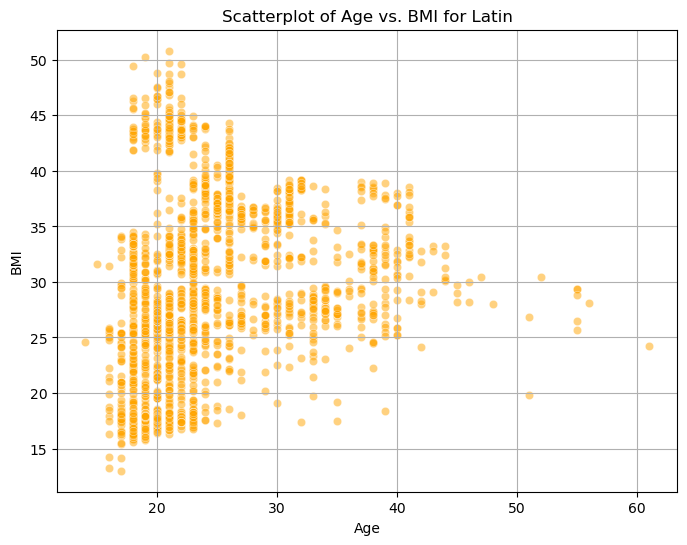

In [32]:
# Creates a scatterplot using seaborn with orange color
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='BMI', data=latin_data, alpha=0.5, color='orange')  # Specify color as 'orange'
plt.title('Scatterplot of Age vs. BMI for Latin')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)

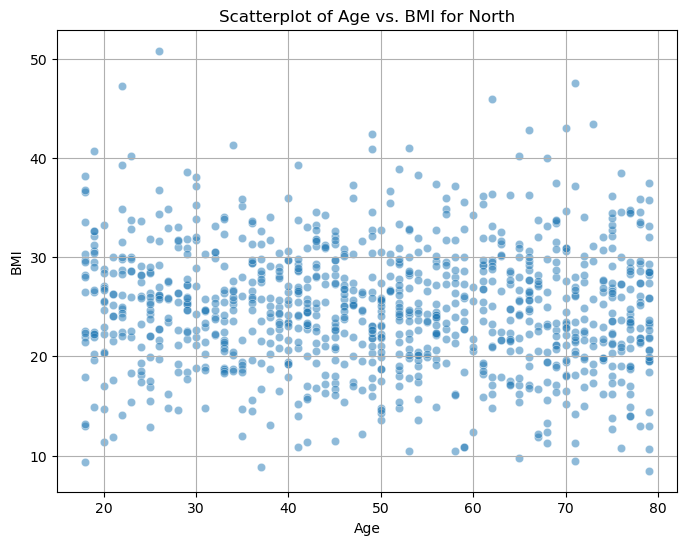

In [33]:
# Create a scatterplot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='BMI', data=usa_data, alpha=0.5)
plt.title('Scatterplot of Age vs. BMI for North')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)

/var/folders/3z/t6nmp__12b38jxsk0_9bb_jc0000gn/T/ipykernel_28639/1621149062.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_by_age_gender = latin_data.groupby(['Age', 'Gender'])['BMI'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observe

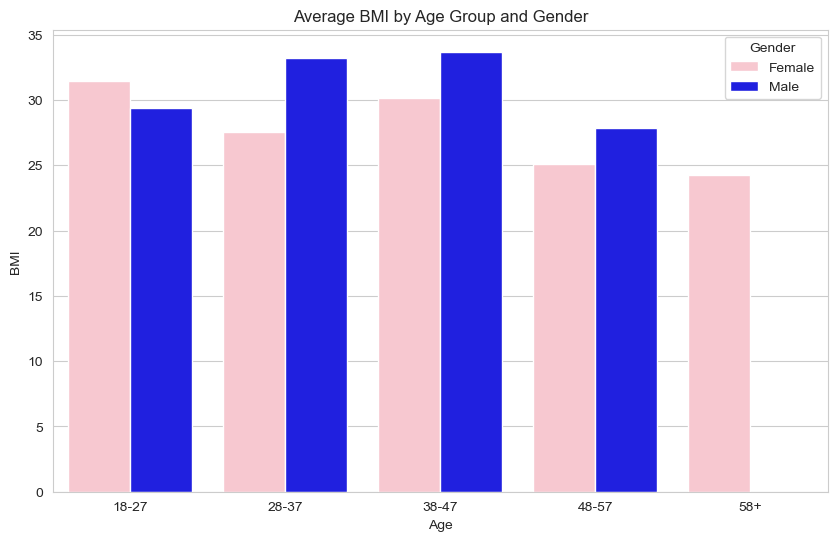

In [34]:
# Create age groups
latin_data['Age'] = pd.cut(latin_data['Age'], bins=[18, 28, 38, 48, 58, 100], labels=['18-27', '28-37', '38-47', '48-57', '58+'])

# Calculate the average BMI for each gender within each age group
bmi_by_age_gender = latin_data.groupby(['Age', 'Gender'])['BMI'].mean().reset_index()

# Create a grouped bar chart
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='BMI', hue='Gender', data=bmi_by_age_gender, 
            palette={'Female': 'pink', 'Male': 'blue'})

plt.title('Average BMI by Age Group and Gender')
plt.ylabel('BMI')
plt.legend(title='Gender')

/var/folders/3z/t6nmp__12b38jxsk0_9bb_jc0000gn/T/ipykernel_28639/3843069473.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_by_age_gender = usa_data.groupby(['Age', 'Gender'])['BMI'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=

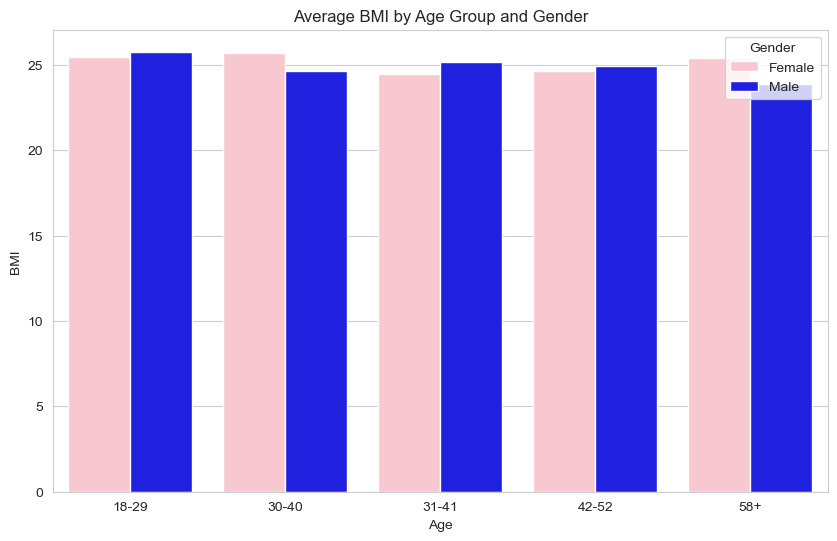

In [35]:
# Create age groups
usa_data['Age'] = pd.cut(usa_data['Age'], bins=[18, 28, 38, 48, 58, 100], labels=['18-29', '30-40', '31-41', '42-52', '58+'])

# Calculate the average BMI for each gender within each age group
bmi_by_age_gender = usa_data.groupby(['Age', 'Gender'])['BMI'].mean().reset_index()

# Create a grouped bar chart
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='BMI', hue='Gender', data=bmi_by_age_gender, 
            palette={'Female': 'pink', 'Male': 'blue'})

plt.title('Average BMI by Age Group and Gender')
plt.ylabel('BMI')
plt.legend(title='Gender')

Text(0.5, 1.0, 'Average BMI by Obesity Level and Gender for Latin')

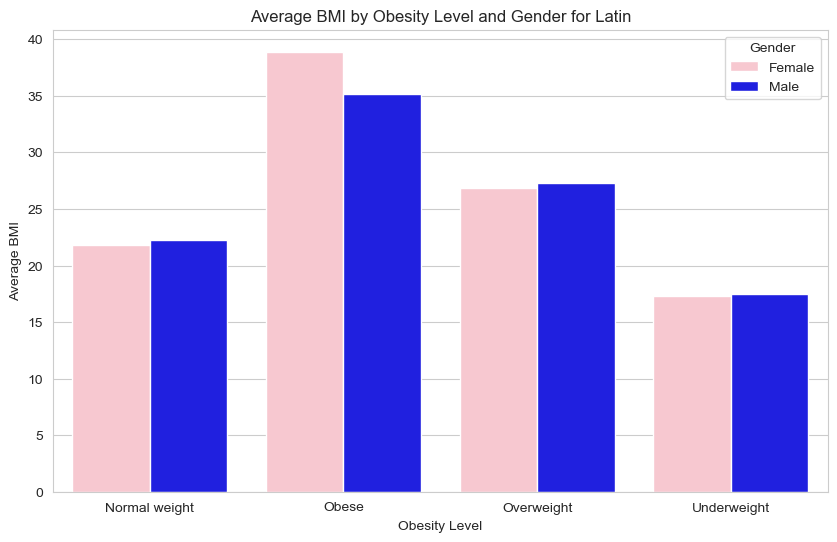

In [36]:
# Create DataFrame for visualization
average_bmi_by_obesity_level_gender = latin_data.groupby(['Gender', 'Obesity_level'])['BMI'].mean().reset_index()

# Plot side-by-side bar chart using seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Obesity_level', y='BMI', hue='Gender', data=average_bmi_by_obesity_level_gender, 
            palette={'Female': 'pink', 'Male': 'blue'})

plt.xlabel('Obesity Level')
plt.ylabel('Average BMI')
plt.title('Average BMI by Obesity Level and Gender for Latin')

Text(0.5, 1.0, 'Average BMI by Obesity Level and Gender for North')

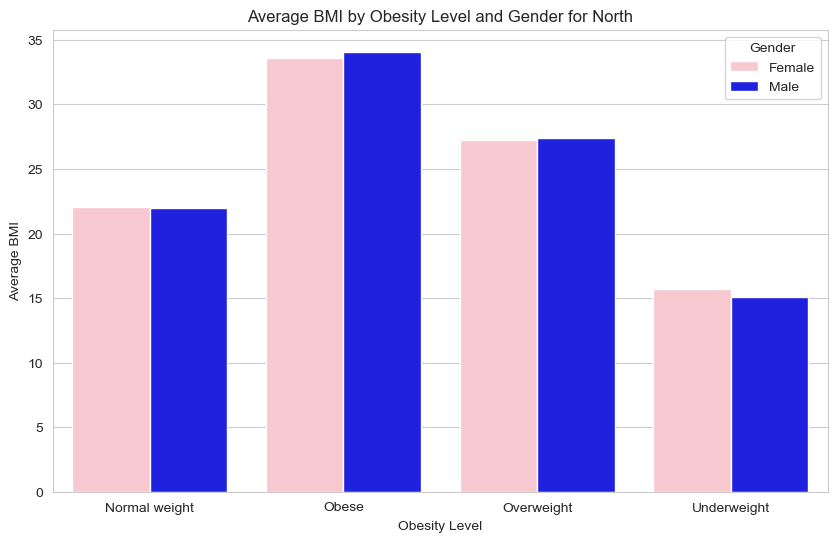

In [37]:
average_bmi_by_obesity_level_gender = usa_data.groupby(['Gender', 'Obesity_level'])['BMI'].mean().reset_index()

# Plot side-by-side bar chart using seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Obesity_level', y='BMI', hue='Gender', data=average_bmi_by_obesity_level_gender, 
            palette={'Female': 'pink', 'Male': 'blue'})

plt.xlabel('Obesity Level')
plt.ylabel('Average BMI')
plt.title('Average BMI by Obesity Level and Gender for North')

In [38]:
obesity_percentage = usa_data.groupby('Gender')['Obesity_level'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

percent =   round(obesity_percentage['percentage'], 2)

obesity_percentage['Obesity_level'] = obesity_percentage['Obesity_level'] + ' \n(' + percent.astype(str) + '%)'

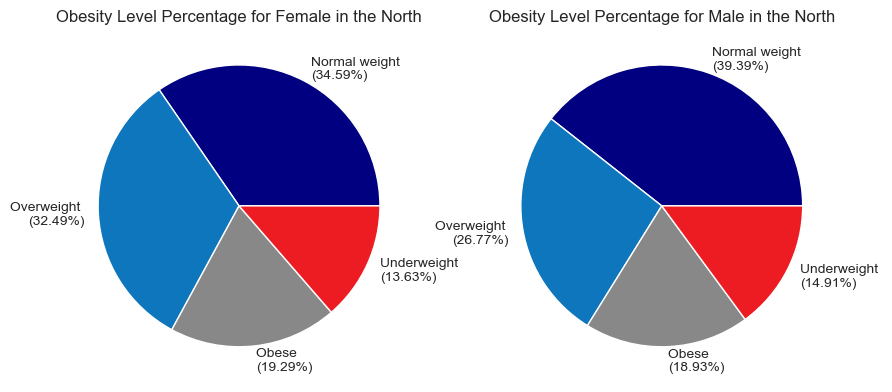

In [39]:
colors = ['navy', '#0d76bd','#888888', '#ed1c23', '#888888']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))



for i, gender in enumerate(['Female', 'Male']):
    obesity_data = obesity_percentage[obesity_percentage['Gender'] == gender]['percentage'].tolist()
    obesity_labels = obesity_percentage[obesity_percentage['Gender'] == gender]['Obesity_level'].tolist()

    axs[i].pie(obesity_data, labels=obesity_labels, colors=colors, autopct='')
    axs[i].set_title(f'Obesity Level Percentage for {gender} in the North')
    

In [40]:
obesity_percentage = latin_data.groupby('Gender')['Obesity_level'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

percent =   round(obesity_percentage['percentage'], 2)

obesity_percentage['Obesity_level'] = obesity_percentage['Obesity_level'] + ' \n(' + percent.astype(str) + '%)'

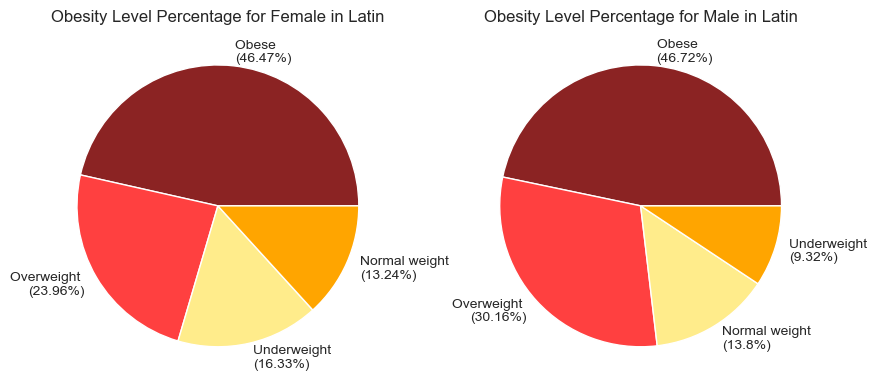

In [41]:
colors = ['#8B2323', '#FF4040', '#FFEC8B', 'orange']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, gender in enumerate(['Female', 'Male']):
    obesity_data = obesity_percentage[obesity_percentage['Gender'] == gender]['percentage'].tolist()
    obesity_labels = obesity_percentage[obesity_percentage['Gender'] == gender]['Obesity_level'].tolist()

    axs[i].pie(obesity_data, labels=obesity_labels, colors=colors, autopct='')
    axs[i].set_title(f'Obesity Level Percentage for {gender} in Latin')